In [1]:
# %load_ext autoreload
# %autoreload 2

import numpy as np
# # import jax
import matplotlib as mpl
import matplotlib.pyplot as plt
from os.path import join
import os
from PIL import Image
from tqdm import tqdm

In [2]:
trial = 0
wdir = '/ocean/projects/phy240015p/mho1/borgnyc'
odir = join(wdir, f'trial{trial}')

os.listdir(odir)

['dens_24.npy',
 'dens_12.npy',
 'modes_optim.npy',
 'dens_50.npy',
 'dens_32.npy',
 'dens_48.npy',
 'dens_52.npy',
 'dens_16.npy',
 'dens_47.npy',
 'rho.npy',
 'dens_26.npy',
 'dens_40.npy',
 'dens_11.npy',
 'dens_46.npy',
 'dens_5.npy',
 'dens_17.npy',
 'dens_35.npy',
 'dens_62.npy',
 'dens_28.npy',
 'dens_37.npy',
 'dens_23.npy',
 'dens_25.npy',
 'dens_0.npy',
 'dens_3.npy',
 'dens_58.npy',
 'dens_29.npy',
 'dens_27.npy',
 'dens_43.npy',
 'dens_44.npy',
 'dens_9.npy',
 'dens_60.npy',
 'dens_38.npy',
 'pvel.npy',
 'dens_49.npy',
 'dens_31.npy',
 'dens_19.npy',
 'dens_2.npy',
 'dens_10.npy',
 'dens_22.npy',
 'dens_21.npy',
 'densities.png',
 'truth.jpg',
 'dens_41.npy',
 'dens_1.npy',
 'dens_8.npy',
 'dens_18.npy',
 'dens_57.npy',
 'dens_30.npy',
 'dens_14.npy',
 'dens_53.npy',
 'dens_42.npy',
 'dens_55.npy',
 'dens_6.npy',
 'dens_39.npy',
 'ppos.npy',
 'dens_4.npy',
 'dens_13.npy',
 'rho.jpg',
 'dens_56.npy',
 'dens_59.npy',
 'dens_7.npy',
 'dens_36.npy',
 'dens_51.npy',
 'dens_45.np

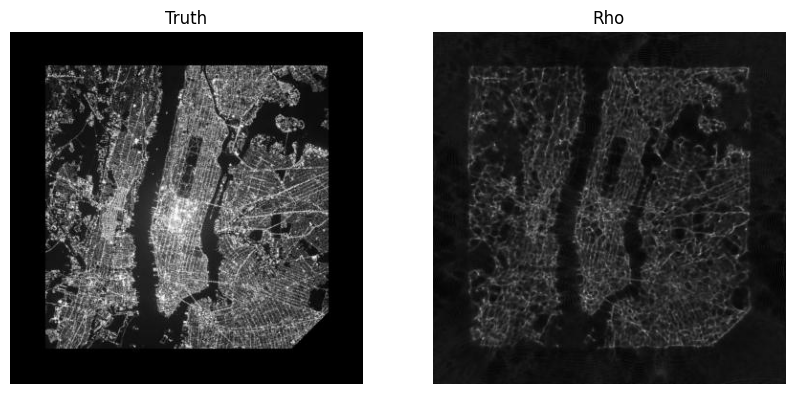

In [40]:
img = Image.open(join(odir, 'truth.jpg'))
imgr = Image.open(join(odir, 'rho.jpg'))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot truth.jpg
axes[0].imshow(img)
axes[0].axis('off')
axes[0].set_title('Truth')

# Plot rho.jpg
axes[1].imshow(imgr)
axes[1].axis('off')
axes[1].set_title('Rho')

plt.show()

[ 0.          6.7913518  14.64532557 64.18774414]


Text(0.5, 1.0, 'Reconstruction')

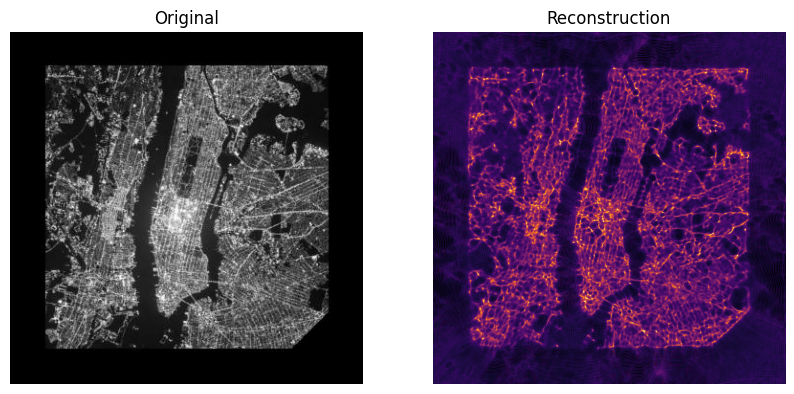

In [41]:
rho = np.load(join(odir, 'rho.npy'))
print(np.percentile(rho.flatten(), [0, 50, 90, 100]))

f, axs = plt.subplots(1, 2, figsize=(10, 5))

ax = axs[0]
ax.imshow(img)
ax.axis('off')
ax.set_title('Original')

ax = axs[1]
ax.imshow(rho, cmap='inferno', vmin=0, vmax=40)
ax.axis('off')
ax.set_title('Reconstruction')

Text(0.5, 1.0, 'Initial Conditions')

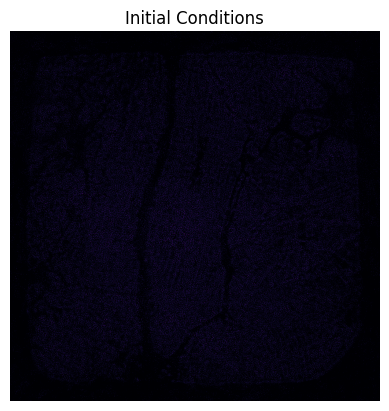

In [42]:
modes = np.load(join(odir, 'modes_optim.npy'))

f, ax = plt.subplots()
ax.imshow(modes.sum(axis=-1), cmap='inferno', vmin=0, vmax=40)
ax.axis('off')
ax.set_title('Initial Conditions')

16it [00:00, 44.70it/s]


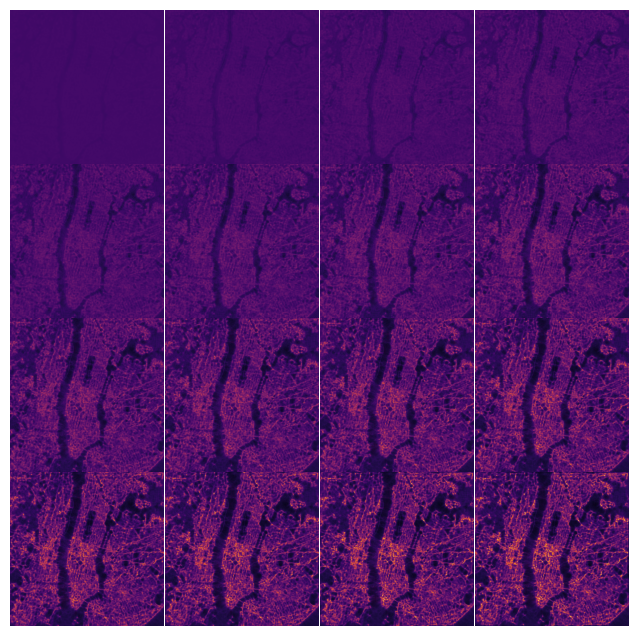

In [43]:
N = 63
H, W = 4, 4
f, axs = plt.subplots(H, W, figsize=(W*2, H*2),
                      gridspec_kw={'hspace': 0, 'wspace': 0})
axs = axs.flatten()

for i, ax in tqdm(enumerate(axs)):
    r = np.load(join(odir, f'dens_{4*i}.npy'))
    p = 64
    r = r[p:-p, p:-p]
    ax.imshow(r, cmap='inferno', vmin=0, vmax=40)
    ax.axis('off')

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

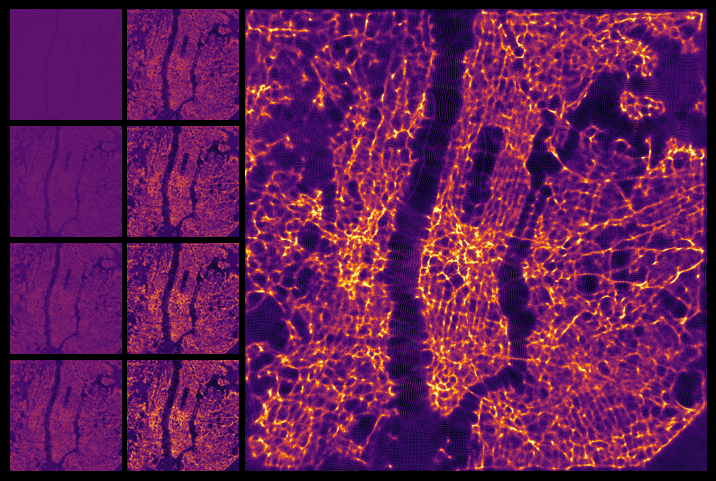

In [60]:
f = plt.figure(figsize=(9, 6), facecolor='black')
gs = mpl.gridspec.GridSpec(4, 6, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = plt.subplot(gs[i % 4, i//4])
    r = np.load(join(odir, f'dens_{8*i}.npy'))
    p = 64
    r = r[p:-p, p:-p]
    ax.imshow(r, cmap='inferno', vmin=0, vmax=30, interpolation='spline16')
    ax.axis('off')

ax = plt.subplot(gs[:, 2:])
r = rho[p:-p, p:-p]
ax.imshow(r, cmap='inferno', vmin=0, vmax=30, interpolation='spline16')
ax.axis('off')

# plt.savefig('densities.png', dpi=72, bbox_inches='tight', facecolor='black')

In [56]:
r = np.load(join(odir, 'dens_0.npy'))
r = np.log10(r)
# r -= r.mean()
# r /= r.std()

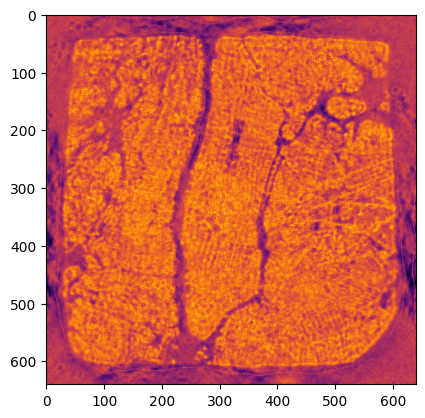

In [58]:
plt.imshow(r, cmap='inferno')

In [ ]:

ppos = np.load(join(odir, 'ppos.npy'))

(array([1.95121765e-03, 9.05990601e-05, 1.82337244e-05]),
 array([5119.99652863, 5119.9999752 ,   63.99999985]))

In [23]:
import MAS_library as MASL

# number of particles
Np = 256**2

# density field parameters
grid = 1024  # the 2D field will have grid x grid pixels
BoxSize = 5120.0  # Mpc/h ; size of box
MAS = 'TSC'  # mass-assigment scheme
verbose = True  # print information on progress

# define 2D density field
delta = np.zeros((grid, grid), dtype=np.float32)

# construct 2D density field
MASL.MA(ppos[:, :2].astype(np.float32), delta, BoxSize, MAS, verbose=verbose)


Using TSC mass assignment scheme
Time taken = 0.149 seconds



(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

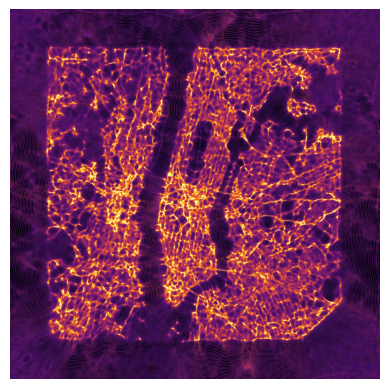

In [24]:
plt.imshow(delta, cmap='inferno', vmin=0, vmax=10)
plt.axis('off')